In [92]:
#Configuracion inicial
%matplotlib inline
import matplotlib.pyplot as plt #librería para graficas de python
import numpy # extiende las librerias de matemática de python
import pandas #libreria para procesamiento de datos muy usada en la industria
import seaborn # Extiende las funcionalidades de matplotlib, muy usado en data visualization
import os # librería para interactuar con el sistema de archivos 

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

# Archivos
sca_dir = 'DATA/'
archivos_sca = os.listdir(sca_dir)
print("Archivos sca cargados:",', '.join(archivos_sca))

Archivos sca cargados: parte1-caso1.csv, parte1-caso2.csv


## Caso 1

In [93]:
## Grafico de buffer en el generador
data = []
for caso in range(len(archivos_sca)):
    aux = pandas.read_csv(sca_dir + archivos_sca[caso])
    data.append(aux)

print("archivos cargados: ",', '.join(archivos_sca))


archivos cargados:  parte1-caso1.csv, parte1-caso2.csv


### Ocupacion de buffers en el sistema

<function matplotlib.pyplot.show(close=None, block=None)>

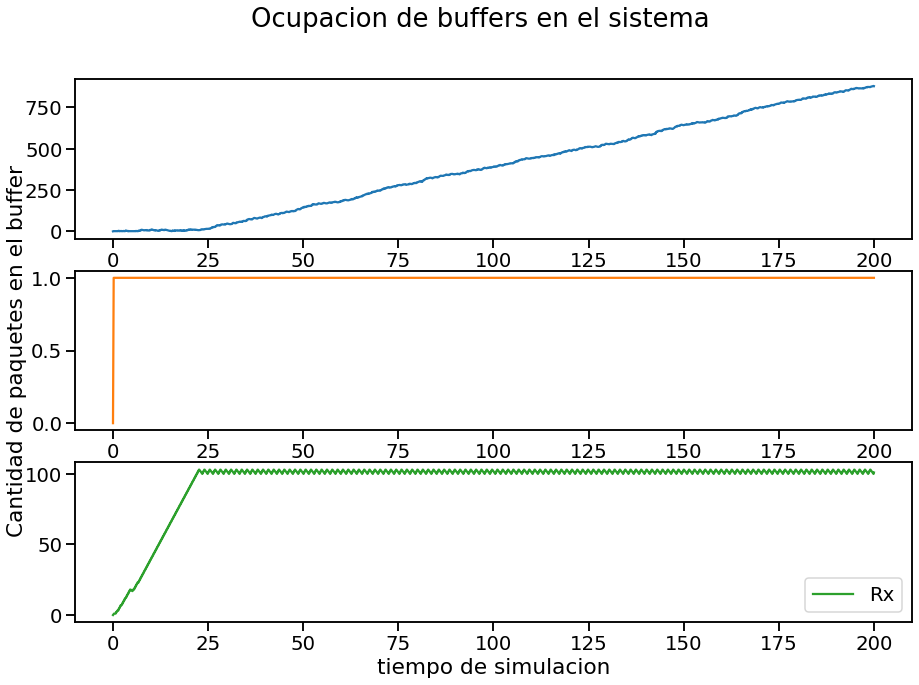

In [98]:
# Extraemos los valores de nuestro "vector"
caso = data[0]
time_gen = caso.loc[(caso['module'] == 'Network.nodeTx.traTx') & (caso['name'] == 'BufferSizeVector'), 'vectime'].tolist()
buffer_gen = caso.loc[(caso['module'] == 'Network.nodeTx.traTx') & (caso['name'] == 'BufferSizeVector'), 'vecvalue'].tolist()

time_queue = caso.loc[(caso['module'] == 'Network.queue0') & (caso['name'] == 'BufferSizeVector'), 'vectime'].tolist()
buffer_queue = caso.loc[(caso['module'] == 'Network.queue0') & (caso['name'] == 'BufferSizeVector'), 'vecvalue'].tolist()

time_sink = caso.loc[(caso['module'] == 'Network.nodeRx.traRx') & (caso['name'] == 'BufferSizeVector'), 'vectime'].tolist()
buffer_sink = caso.loc[(caso['module'] == 'Network.nodeRx.traRx') & (caso['name'] == 'BufferSizeVector'), 'vecvalue'].tolist()

# convertimos los valores (ahora strings separados por comas) a listas para poder graficarlos
time_gen = list(map(float,time_gen[0].split()))
time_queue = list(map(float,time_queue[0].split()))
time_sink = list(map(float,time_sink[0].split()))
buffer_gen = list(map(float,buffer_gen[0].split()))
buffer_queue = list(map(float,buffer_queue[0].split()))
buffer_sink = list(map(float,buffer_sink[0].split()))

# Graficamos
fig, ax = plt.subplots(3,figsize=(15, 10))
fig.suptitle('Ocupacion de buffers en el sistema')
ax[0].plot(time_gen,buffer_gen, color='tab:blue', label="Tx")
ax[1].plot(time_queue,buffer_queue, color='tab:orange', label="Nx")
ax[2].plot(time_sink,buffer_sink, color='tab:green', label="Rx")
plt.title('')
plt.xlabel("tiempo de simulacion")
ax[1].set_ylabel("Cantidad de paquetes en el buffer")
plt.legend()
plt.show

### Paquetes generados y paquetes consumidos

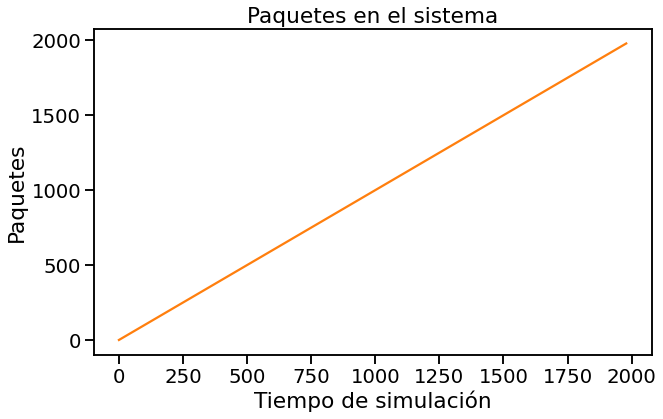

In [95]:
# FIXME: datos incorrectos
caso = data[0]
# Extraemos la info
time_gen = caso.loc[(caso['module'] == 'Network.nodeTx.gen') & (caso['name'] == 'packetSent'), 'vectime'].tolist()
packets_gen = caso.loc[(caso['module'] == 'Network.nodeTx.gen') & (caso['name'] == 'packetSent'), 'vecvalue'].tolist()

time_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'packetReceived'), 'vectime'].tolist()
packets_sink = caso.loc[(caso['module'] == 'Network.nodeRx.sink') & (caso['name'] == 'packetReceived'), 'vecvalue'].tolist()

# Convertimos los valores a flotantes
time_gen = list(map(float,time_gen[0].split()))
packets_gen = list(map(float,packets_gen[0].split()))
time_sink = list(map(float,time_sink[0].split()))
packets_sink = list(map(float,packets_sink[0].split()))

time = []
count_gen = 0
count_sink = 0
while count_gen < len(time_gen) or count_sink < len(time_sink):
    if count_gen < len(time_gen) and ( count_sink >= len(time_sink) or (count_sink < len(time_sink) and time_gen[count_gen] < time_sink[count_sink])):
        time.append(time_gen[count_gen])
        count_gen += 1
    else:
        time.append(time_sink[count_sink])
        count_sink += 1

network_packets = []
count_gen = 0
for i in range(0,len(time)):
    if count_gen < len(time_gen) and time_gen[count_gen] <= time[i] :
        network_packets.append(packets_gen[count_gen])
        count_gen += 1
    else:
        network_packets.append(packets_gen[count_gen-1])

network_packets_copy = network_packets.copy()
count_sink = 0
for i in range(0,len(time)):
    if count_sink < len(time_sink) and time_sink[count_sink] <= time[i]: # FIXME: por los datos mal tomados no anda bien esta guarda
        network_packets[i] -= packets_sink[count_sink]
    else:
        count_sink += 1
        
# Graficamos el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(network_packets_copy, network_packets, color='tab:orange', label='pks')
plt.title('Paquetes en el sistema')
plt.xlabel('Tiempo de simulación')
plt.ylabel('Paquetes')
plt.show()

## Carga util vs carga recibida/ofrecida
Los datos se sacan de todos los casos

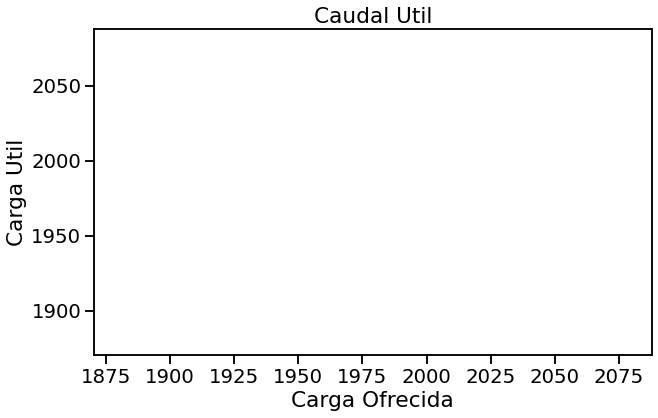

In [99]:
# FIXME: datos de ejemplo, cargar reales

# Carga Util de los casos 1,...,n = cUtil
# Carga ofrecida de los casos 1,...,n = cOfrecida

cUtil = []     # X
for i in range(0, len(data)-1):
    cUtil.append(packets_gen[len(packets_gen)-1])

cOfrecida = [] # Y
for i in range(0, len(data)-1):
    cOfrecida.append(packets_gen[len(packets_gen)-1])

# Graficamos el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(cUtil, cOfrecida, color='tab:orange', label='Carga Recibida')
plt.plot(cUtil, cUtil, color='tab:blue', label='Carga Esperada', linestyle='--')
plt.title('Caudal Util')
plt.xlabel('Carga Ofrecida')
plt.ylabel('Carga Util')
plt.show()

# FIXME: no esta en paquetes por segundo, no se bien como seria graficar el esperado.